Dylan Rohan - a1844790
***

## Week 1 - Assessment 1 - Part A

As luck would have it this is the dataset I used last week. There are 178 rows and 13 columns with no missing values. Each row represents a wine bottle produced by one of three cultivators from the same region in Italy.

In [4]:
# Loading modules required for data selection
import pandas as pd
import numpy as np

# Selecting and preparing data
from sklearn import datasets
wine_df = pd.DataFrame(datasets.load_wine().data)
wine_df.columns = datasets.load_wine().feature_names
class_target = datasets.load_wine().target # The true values
wine_df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


#### The Machine learning pipeline
The machine learning pipeline is as follows:
1. Problem defenition  (Determining which of three cultivaters produced a wine)
2. Data ingestion      (Loading in the load_wine data)
3. Data preparation    (Dataset is already Clean)
4. Data segregation    (Creating training and testing sets)
5. Model training      (Creating the model and building with training set)
6. Model selection     (Optimizing hyperparameters and features to improve model accuracy) 


#### Model 1 - Random Forest model 

In [5]:
# Loading modules required for modelling
from sklearn.ensemble import RandomForestClassifier     # To access the Random Forest model
from sklearn.model_selection import train_test_split    # To create training/testing sets
from sklearn.model_selection import GridSearchCV        # To creat a tuning grid for hyperparameters

# loading modules to assess model
from sklearn.model_selection import cross_val_score     # To determine the model's cross validation accuracy scores
from sklearn.metrics import accuracy_score              # To determine the model's accuracy
from sklearn.metrics import classification_report       # For prediction

# Loading modules to plot confusion matrix
import matplotlib.pyplot as plt                         # This one
import seaborn as sns                                   # ... and this one are used to create figure objects
from sklearn.metrics import confusion_matrix            # To create confusion matrix
%matplotlib inline

# Creating model
model1 = RandomForestClassifier(n_estimators=1200)

# Tuning hyperparams
grid_rf = {'max_depth': [int(x) for x in np.linspace(1, 10, num = 2)],
           'max_features': [5, 6, 7, 8]}

tuned_rf = GridSearchCV(model1, grid_rf, cv = 5)

# Creating training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(wine_df, class_target, 
                                                    random_state = 42) # random_state -> a seed for the random generator

# Fitting the models
model1.fit(X_train, y_train) # Built with training set
tuned_rf.fit(X_train, y_train) # Built with training set

# Deteriming cross fold validation scores
def Average(lst):
    return sum(lst) / len(lst)

score_untuned_rf = cross_val_score(model1, wine_df, class_target, cv = 5)
print("Cross Validation scores (untuned): ", score_untuned_rf, "\nCV score = ", Average(score_untuned_rf)) 
score_tuned_rf = cross_val_score(tuned_rf, wine_df, class_target, cv = 5)
print("\nCross Validation scores (tuned): ", score_tuned_rf, "\nCV score= ",Average(score_tuned_rf)) 

# Making prediction and assessing
y_predict = model1.predict(X_test) # Tested with testing set
print("True values: \n", y_test, "\n",
      "\nPredicted values: \n", y_predict,"\n",
      "\nAccuracy score: ", accuracy_score(y_test, y_predict),"\n",
      "\nClassification Report: \n", classification_report(y_test, y_predict))

y_predict_tuned = model1.predict(X_test) # Tested with testing set
print("True values: \n", y_test, "\n",
      "\nPredicted values: \n", y_predict_tuned,"\n",
      "\nAccuracy score: ", accuracy_score(y_test, y_predict_tuned),"\n",
      "\nClassification Report: \n", classification_report(y_test, y_predict_tuned))

# Creating a confusion matrix
    # Untuned
rf_model_cmatrix = plt.figure(figsize=(7,7))

cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square = True, annot=True, fmt='d', cbar=False,
           cmap=cmap)

plt.xlabel('True Class', size=12)
plt.ylabel('Predicted Class ', size=12)
plt.title('Confusion Matrix - Wine clutivator Random Forest Classifier (untuned)')

    # Tuned
rf_model_cmatrix_tuned = plt.figure(figsize=(7,7))

cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)
cm = confusion_matrix(y_test, y_predict_tuned)
sns.heatmap(cm.T, square = True, annot=True, fmt='d', cbar=False,
           cmap=cmap)

plt.xlabel('True Class', size=12)
plt.ylabel('Predicted Class ', size=12)
plt.title('Confusion Matrix - Wine clutivator Random Forest Classifier (tuned)')

Cross Validation scores (untuned):  [0.94444444 0.94444444 0.94444444 0.97142857 1.        ] 
CV score =  0.9609523809523809


KeyboardInterrupt: 

#### Model 2 - Support Vector Machine
I happen to know that these three classes are well seperated based on last weeks assignmnet (lucky me), so this model will be sufficient.


 <bound method Pipeline.get_params of Pipeline(steps=[('pca', PCA(n_components=8, random_state=42, whiten=True)),
                ('svc', SVC(class_weight='balanced'))])>
Cross Validation scores:  [0.91666667 0.97222222 0.91666667 1.         1.        ] 
CV score =  0.961111111111111
Cross Validation scores:  [0.88888889 0.94444444 0.94444444 1.         0.97142857] 
CV score =  0.9498412698412698
True values: 
 [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2] 
 
Predicted values (untuned): 
 [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 1
 2 1 2 0 1 1 1 2] 
 
Accuracy score(untuned):  0.9777777777777777 
 
Classification Report: 
               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        15
     class 1       0.95      1.00      0.97        18
     class 2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg     

Text(0.5, 1.0, 'Confusion Matrix -  Wine culitvator support-vector Classifier')

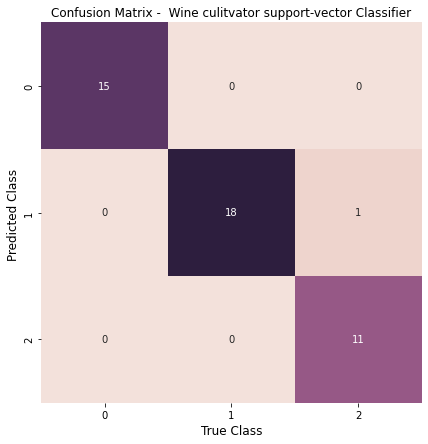

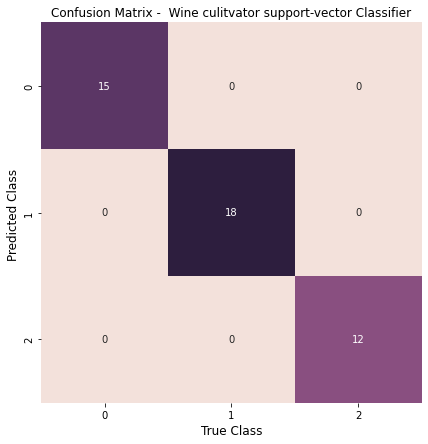

In [8]:
# Loading modules required for modelling
from sklearn.svm import SVC                             # To access the Support vector model
from sklearn.model_selection import train_test_split    # To create training/testing sets
from sklearn.model_selection import GridSearchCV        # To creat a tuning grid for hyperparameters
from sklearn.decomposition import PCA                   # Feature selection tool
from sklearn.pipeline import make_pipeline              # Lets us build a pipeline

# loading modules to assess model
from sklearn.model_selection import cross_val_score     # To determine the model's cross validation accuracy scores
from sklearn.metrics import classification_report       # For prediction

# Loading modules to plot confusion matrix
import matplotlib.pyplot as plt                         # This one
import seaborn as sns                                   # ... and this one are used to create figure objects
from sklearn.metrics import confusion_matrix            # To create confusion matrix
%matplotlib inline

# Creating model with feature selection (PCA)
model_svc = SVC(kernel = 'rbf',                            
             class_weight = 'balanced',                 # 'balanced' will make class instances proportional
             gamma = 'scale')                           #  scale = 1 / (n_features * X.var())  (needed for kernel)  

pca = PCA(n_components = 8,                             # Selecting most informative 8 features
          whiten = True,                                # Using uncorrelated components
          random_state = 42)                            # Setting a seed

model2 = make_pipeline(pca, model_svc)
print("\n", model2.get_params)
# Tuning hyperparams
param_grid = [  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']} 
             ]

tuned_svc = GridSearchCV(model_svc, param_grid, cv = 5)
tuned_svc = make_pipeline(pca, tuned_svc)

# Using same training/test splits from above

# Fitting the model
model2.fit(X_train, y_train) # Built with training set
tuned_svc.fit(X_train, y_train) # Built with training set


# Deteriming cross fold validation scores
score_svc_untuned = cross_val_score(model2, wine_df, class_target, cv = 5)
print("Cross Validation scores: ", score_svc_untuned, "\nCV score = ", Average(score_svc_untuned)) 
score_svc_tuned = cross_val_score(tuned_svc, wine_df, class_target, cv = 5)
print("Cross Validation scores: ", score_svc_tuned, "\nCV score = ", Average(score_svc_tuned)) 

#Initially ran into the curse of dimensionality, feature selection fixed this

# Making predictions with the model
y_predict = model2.predict(X_test)
y_predict_tuned = tuned_svc.predict(X_test)

# Assessing results
target_names = ['class 0', 'class 1', 'class 2']
print("True values: \n", y_test, "\n",
      "\nPredicted values (untuned): \n", y_predict,"\n",
      "\nAccuracy score(untuned): ", accuracy_score(y_test, y_predict), "\n",
      "\nClassification Report: \n", classification_report(y_test, y_predict, target_names = target_names))

print("True values: \n", y_test, "\n",
      "\nPredicted values(tuned): \n", y_predict_tuned,"\n",
      "\nAccuracy score (tuned): ", accuracy_score(y_test, y_predict_tuned), "\n",
      "\nClassification Report (tuned): \n", classification_report(y_test, y_predict_tuned, target_names = target_names))

# Creating a confusion matrix
    # untuned
svc_model_cmatrix = plt.figure(figsize=(7,7))
cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)

cm1 = confusion_matrix(y_test, y_predict)
sns.heatmap(cm1.T, square = True, annot=True, fmt='d', cbar=False,
           cmap=cmap)

plt.xlabel('True Class', size=12)
plt.ylabel('Predicted Class ', size=12)
plt.title('Confusion Matrix -  Wine culitvator support-vector Classifier')

    # Tuned
svc_model_cmatrix_tuned = plt.figure(figsize=(7,7))
cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)

cm2 = confusion_matrix(y_test, y_predict_tuned)
sns.heatmap(cm2.T, square = True, annot=True, fmt='d', cbar=False,
           cmap=cmap)

plt.xlabel('True Class', size=12)
plt.ylabel('Predicted Class ', size=12)
plt.title('Confusion Matrix -  Wine culitvator support-vector Classifier')


#### Model 3 - K-nearest neighbour

In [ ]:
# Loading modules required for modelling
from sklearn.neighbors import KNeighborsClassifier      # To access the Random Forest model
from sklearn.model_selection import train_test_split    # To create training/testing sets
from sklearn.model_selection import GridSearchCV        # To creat a tuning grid for hyperparameters
from sklearn.decomposition import PCA                   # Feature selection tool
from sklearn.pipeline import make_pipeline              # Lets us build a pipeline

# loading modules to assess model
from sklearn.metrics import accuracy_score              # To determine the model's accuracy
from sklearn.metrics import classification_report       # For prediction

# Loading modules to plot confusion matrix
import matplotlib.pyplot as plt                         # This one
import seaborn as sns                                   # ... and this one are used to create figure objects
from sklearn.metrics import confusion_matrix            # To create confusion matrix
%matplotlib inline

# Creating model with feature selection (PCA)
model_knn = KNeighborsClassifier(n_neighbors = 10, weights = 'uniform', algorithm = 'auto',
                              leaf_size = 30, p = 2, metric='minkowski', metric_params = None,
                              n_jobs=None)                         

pca = PCA(n_components = 8,                             # Selecting most informative 8 features
          whiten = True,                                # Using uncorrelated components
          random_state = 42)                            # Setting a seed

model3 = make_pipeline(pca, model_knn)


# Using same training/test splits from above

# Tuning hyperparams
grid_params = [{ 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
              ]

tuned_knn = GridSearchCV(model_knn, grid_params, cv = 5)
tuned_knn = make_pipeline(pca, tuned_knn)

# Fitting the model
model3.fit(X_train, y_train) # Built with training set
tuned_knn.fit(X_train, y_train) # Built with training set

# Deteriming cross fold validation scores
score_knn = cross_val_score(model3, wine_df, class_target, cv = 5)
print("Cross validation scores: ", score_knn, "\nCV score = ", Average(score_knn)) 
score_knn_tuned = cross_val_score(tuned_knn, wine_df, class_target, cv = 5)
print("Cross validation scores: ", score_knn_tuned, "\nCV score = ", Average(score_knn_tuned)) 

#Initially ran into the curse of dimensionality, feature selection fixed this

# Making predictions with the model
y_predict = model3.predict(X_test)
y_predict_tuned = tuned_knn.predict(X_test)

# Assessing results
target_names = ['class 0', 'class 1', 'class 2']
print("True values: \n", y_test, "\n",
      "\nPredicted values: \n", y_predict,"\n",
      "\nAccuracy score: ", accuracy_score(y_test, y_predict), "\n",
      "\nClassification Report: \n", classification_report(y_test, y_predict, target_names = target_names))
print("True values: \n", y_test, "\n",
      "\nPredicted values (tuned): \n", y_predict_tuned,"\n",
      "\nAccuracy score (tuned): ", accuracy_score(y_test, y_predict_tuned), "\n",
      "\nClassification Report (tuned): \n", classification_report(y_test, y_predict_tuned, target_names = target_names))

# Creating a confusion matrix
    # untuned
knn_model_cmatrix = plt.figure(figsize=(7,7))
cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)

cm1 = confusion_matrix(y_test, y_predict)
sns.heatmap(cm1.T, square = True, annot=True, fmt='d', cbar=False,
           cmap=cmap)

plt.xlabel('True Class', size=12)
plt.ylabel('Predicted Class ', size=12)
plt.title('Confusion Matrix -  Wine culitvator support-vector Classifier (untuned)')

    # tuned
knn_model_cmatrix = plt.figure(figsize=(7,7))
cmap = sns.cubehelix_palette(light=0.9, as_cmap=True)

cm2 = confusion_matrix(y_test, y_predict_tuned)
sns.heatmap(cm2.T, square = True, annot=True, fmt='d', cbar=False,
           cmap=cmap)

plt.xlabel('True Class', size=12)
plt.ylabel('Predicted Class ', size=12)
plt.title('Confusion Matrix -  Wine culitvator support-vector Classifier (tuned)')

### Summary
Three models were assessed:
* Random Forest classifier
* Support-vector classifier
* K-nearest neighbour classifier

The most complex of these was the Random Forest Classifier, on this occassion it was also the most accurate (accurately classified every wine in the testing set, even before tuning). The other two classifiers are far simpler in nature which meant that the curse of dimensionality came into play a bit more. That being the case, Principle component analysis was used for feature selection; keeping the eight most important features.  The Support_vector classifier and k-nearest neighbout achieved the same accuracy score prior to tuning, miss classifying only one wine incorrectly (Support vector machine placing a class 2 wine in class 1 and k nearest neighbor placing a class 1 wine in class 2). After tuning, the SVC model was as accurate as the random forest model, and while the knn's CV score improved, it's accuracy score was unchanged.

Computationaly, the support-vector classifier is the most inexpensive. Depending on your needs, the trade off between accuracy and complexity may make the support-vector classifier a worthwhile option; particularly if you expect the dataset to grow over time.